In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
cars=pd.read_csv("Car_sales.csv")

In [3]:
cars.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [5]:
# import pandas_profiling

In [6]:
# profile_report=pandas_profiling.ProfileReport(cars)

In [7]:
#profile_report

In [8]:
# profile_report.to_file('cars profile report.html')

In [9]:
cars.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [10]:
cars.Power_perf_factor.value_counts()

52.084899    2
42.879097    1
58.280150    1
84.830779    1
67.544155    1
            ..
69.521355    1
72.290355    1
80.387779    1
98.249737    1
81.877069    1
Name: Power_perf_factor, Length: 154, dtype: int64

In [11]:
#features to be dropped : Model,lates launch(beacause of having large number of distinct values)

In [12]:
cars.drop(columns=['Model','Latest_Launch'],inplace=True)

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Sales_in_thousands      157 non-null    float64
 2   four_year_resale_value  121 non-null    float64
 3   Vehicle_type            157 non-null    object 
 4   Price_in_thousands      155 non-null    float64
 5   Engine_size             156 non-null    float64
 6   Horsepower              156 non-null    float64
 7   Wheelbase               156 non-null    float64
 8   Width                   156 non-null    float64
 9   Length                  156 non-null    float64
 10  Curb_weight             155 non-null    float64
 11  Fuel_capacity           156 non-null    float64
 12  Fuel_efficiency         154 non-null    float64
 13  Power_perf_factor       155 non-null    float64
dtypes: float64(12), object(2)
memory usage: 17

In [14]:
cont_vars=cars.dtypes[cars.dtypes=='float64'].index.to_list()

In [15]:
cont_vars

['Sales_in_thousands',
 'four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [16]:
cat_vars=cars.dtypes[cars.dtypes=='object'].index.to_list()

In [17]:
cat_vars

['Manufacturer', 'Vehicle_type']

In [18]:
cars.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Handling missings

In [19]:
cars.shape[0]-cars.notnull().sum()

Manufacturer               0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Power_perf_factor          2
dtype: int64

In [20]:
def cont_missings(df,cols):
    for feature in cols:
        df[feature].fillna(df[feature].median(),inplace=True)
        
        

In [21]:
def cat_missings(df,cols):
    for feature in cols:
        df[feature].fillna(df[feature].mode()[0],inplace=True)

In [22]:
cont_missings(cars,cont_vars)

In [23]:
cat_missings(cars,cat_vars)

In [24]:
cars.shape[0]-cars.notnull().sum()

Manufacturer              0
Sales_in_thousands        0
four_year_resale_value    0
Vehicle_type              0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb_weight               0
Fuel_capacity             0
Fuel_efficiency           0
Power_perf_factor         0
dtype: int64

In [25]:
cars.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,17.180318,27.332261,3.060510,185.894904,107.484076,71.146178,187.347134,3.377567,17.947134,23.847134,76.979735
std,68.029422,10.178562,14.268713,1.041311,56.522319,7.616872,3.441124,13.388708,0.626460,3.875905,4.241380,24.987338
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,12.545000,18.145000,2.300000,150.000000,103.000000,68.400000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,18.140000,31.930000,3.500000,215.000000,112.200000,73.400000,196.100000,3.778000,19.500000,26.000000,89.401935
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Handling Outliers

In [26]:
def outliers(df,cols):
    for feature in cols:
        iqr=df[feature].quantile(0.75)-df[feature].quantile(0.25)
        lower_cuttoff= df[feature].quantile(0.25)-1.5*iqr
        upper_cutoff= df[feature].quantile(0.75) +1.5*iqr
        df[feature].clip(lower=lower_cuttoff,upper=upper_cutoff,inplace=True)
        
        
        

In [27]:
outliers(cars,cont_vars)

In [28]:
cars.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,46.150732,15.539411,26.337627,3.03758,184.812102,107.284076,71.146178,187.343631,3.367688,17.772611,23.773885,76.416451
std,43.632116,5.301200,11.367896,0.96519,52.817550,6.951088,3.441124,13.362948,0.596571,3.397725,3.963959,23.233865
min,0.110000,5.160000,9.235000,1.00000,55.000000,92.600000,62.600000,149.850000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,12.545000,18.145000,2.30000,150.000000,103.000000,68.400000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,14.180000,22.799000,3.00000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,18.140000,31.930000,3.50000,215.000000,112.200000,73.400000,196.100000,3.778000,19.500000,26.000000,89.401935
max,148.719000,26.532500,52.607500,5.30000,312.500000,126.000000,79.900000,223.850000,4.982500,25.050000,33.500000,132.413666


### Encoding

In [29]:
cars[cat_vars]

,Manufacturer,Vehicle_type
0,Acura,Passenger
1,Acura,Passenger
2,Acura,Passenger
3,Acura,Passenger
4,Audi,Passenger
...,...,...
152,Volvo,Passenger
153,Volvo,Passenger
154,Volvo,Passenger
155,Volvo,Passenger


In [30]:
Manufacturer_list=cars.Manufacturer.value_counts().index[:10]

In [31]:
Manufacturer_list

Index(['Dodge', 'Ford', 'Chevrolet', 'Toyota', 'Mercedes-B', 'Nissan',
       'Chrysler', 'Mitsubishi', 'Volkswagen', 'Lexus'],
      dtype='object')

In [32]:
Manufacturer_dummies=pd.get_dummies(data=cars.Manufacturer,prefix='Manufacturer')['Manufacturer_'+Manufacturer_list]

In [33]:
Vehicle_type_dummies=pd.get_dummies(data=cars.Vehicle_type,prefix='Vehicle_type')

In [34]:
Vehicle_type_dummies

,Vehicle_type_Car,Vehicle_type_Passenger
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
152,0,1
153,0,1
154,0,1
155,0,1


In [35]:
Manufacturer_dummies

,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Chevrolet,Manufacturer_Toyota,Manufacturer_Mercedes-B,Manufacturer_Nissan,Manufacturer_Chrysler,Manufacturer_Mitsubishi,Manufacturer_Volkswagen,Manufacturer_Lexus
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
152,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0


In [36]:
cars=pd.concat([cars,Manufacturer_dummies,Vehicle_type_dummies],axis=1)

In [37]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Manufacturer             157 non-null    object 
 1   Sales_in_thousands       157 non-null    float64
 2   four_year_resale_value   157 non-null    float64
 3   Vehicle_type             157 non-null    object 
 4   Price_in_thousands       157 non-null    float64
 5   Engine_size              157 non-null    float64
 6   Horsepower               157 non-null    float64
 7   Wheelbase                157 non-null    float64
 8   Width                    157 non-null    float64
 9   Length                   157 non-null    float64
 10  Curb_weight              157 non-null    float64
 11  Fuel_capacity            157 non-null    float64
 12  Fuel_efficiency          157 non-null    float64
 13  Power_perf_factor        157 non-null    float64
 14  Manufacturer_Dodge       1

In [38]:
cars.drop(columns=['Manufacturer','Vehicle_type'],inplace=True)

In [39]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sales_in_thousands       157 non-null    float64
 1   four_year_resale_value   157 non-null    float64
 2   Price_in_thousands       157 non-null    float64
 3   Engine_size              157 non-null    float64
 4   Horsepower               157 non-null    float64
 5   Wheelbase                157 non-null    float64
 6   Width                    157 non-null    float64
 7   Length                   157 non-null    float64
 8   Curb_weight              157 non-null    float64
 9   Fuel_capacity            157 non-null    float64
 10  Fuel_efficiency          157 non-null    float64
 11  Power_perf_factor        157 non-null    float64
 12  Manufacturer_Dodge       157 non-null    uint8  
 13  Manufacturer_Ford        157 non-null    uint8  
 14  Manufacturer_Chevrolet   1

### Feature Engineering

<AxesSubplot:>

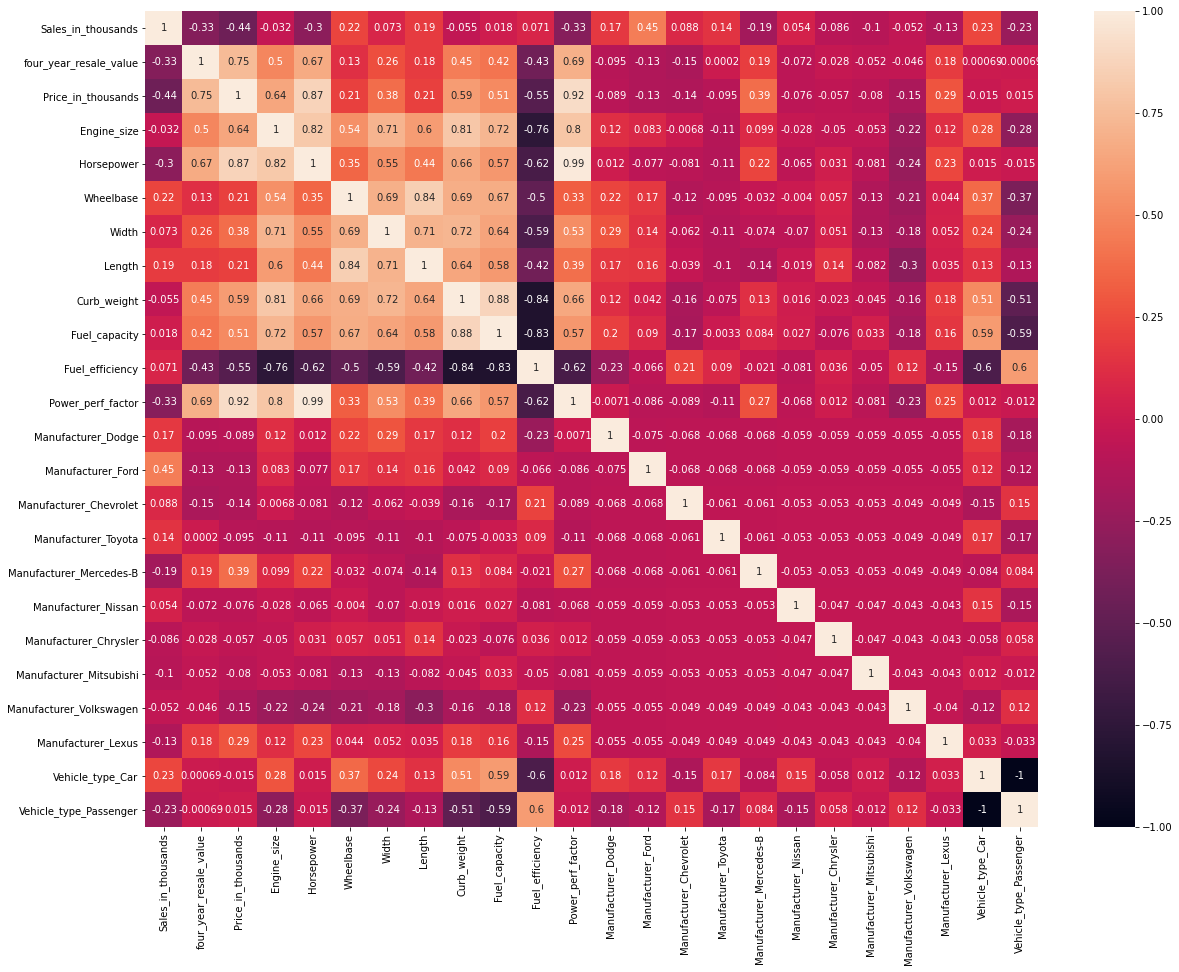

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(cars.corr(),annot=True)

In [41]:
cars.corr()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Chevrolet,Manufacturer_Toyota,Manufacturer_Mercedes-B,Manufacturer_Nissan,Manufacturer_Chrysler,Manufacturer_Mitsubishi,Manufacturer_Volkswagen,Manufacturer_Lexus,Vehicle_type_Car,Vehicle_type_Passenger
Sales_in_thousands,1.000000,-0.331611,-0.435137,-0.032038,-0.296463,0.221016,0.073260,0.186923,-0.054607,0.017753,...,0.087573,0.142108,-0.187881,0.054338,-0.086093,-0.100871,-0.051708,-0.129904,0.231634,-0.231634
four_year_resale_value,-0.331611,1.000000,0.746240,0.495095,0.666963,0.130167,0.262460,0.181974,0.453680,0.421080,...,-0.153077,0.000196,0.190258,-0.072159,-0.028183,-0.052215,-0.046094,0.181703,0.000691,-0.000691
Price_in_thousands,-0.435137,0.746240,1.000000,0.641182,0.868937,0.205510,0.384062,0.207982,0.594514,0.513823,...,-0.137423,-0.094768,0.385027,-0.075815,-0.057135,-0.079500,-0.151975,0.285590,-0.015026,0.015026
Engine_size,-0.032038,0.495095,0.641182,1.000000,0.815810,0.540170,0.713003,0.596074,0.807780,0.721239,...,-0.006784,-0.106460,0.098588,-0.027683,-0.050137,-0.053344,-0.221879,0.119979,0.282728,-0.282728
Horsepower,-0.296463,0.666963,0.868937,0.815810,1.000000,0.352728,0.552160,0.436363,0.657550,0.572538,...,-0.081087,-0.113093,0.222060,-0.064879,0.030958,-0.080705,-0.242232,0.231035,0.015479,-0.015479
Wheelbase,0.221016,0.130167,0.205510,0.540170,0.352728,1.000000,0.691230,0.844424,0.685769,0.673808,...,-0.119252,-0.094735,-0.032255,-0.003957,0.056616,-0.130003,-0.212431,0.044091,0.371989,-0.371989
Width,0.073260,0.262460,0.384062,0.713003,0.552160,0.691230,1.000000,0.710031,0.722492,0.637522,...,-0.062431,-0.111956,-0.074413,-0.070385,0.050623,-0.133363,-0.182834,0.051555,0.242043,-0.242043
Length,0.186923,0.181974,0.207982,0.596074,0.436363,0.844424,0.710031,1.000000,0.641297,0.584813,...,-0.038965,-0.101600,-0.136569,-0.019474,0.141313,-0.081796,-0.298204,0.034514,0.133800,-0.133800
Curb_weight,-0.054607,0.453680,0.594514,0.807780,0.657550,0.685769,0.722492,0.641297,1.000000,0.880822,...,-0.162196,-0.074629,0.127483,0.015630,-0.022773,-0.044880,-0.163867,0.182708,0.514984,-0.514984
Fuel_capacity,0.017753,0.421080,0.513823,0.721239,0.572538,0.673808,0.637522,0.584813,0.880822,1.000000,...,-0.167086,-0.003264,0.083703,0.027260,-0.075703,0.032727,-0.180840,0.159050,0.586212,-0.586212


In [42]:
corr_matrix=cars.corr()

In [43]:
corr_matrix.to_excel('Correlation matrix.xlsx')

In [44]:
#from correlation matix, these are some features which are highly correlated to Sales_in_thousands

# Manufacturer_Ford
# Vehicle_type_Car
# Wheelbase
# Length
# Manufacturer_Dodge
# Manufacturer_Toyota

# Manufacturer_Mitsubishi
# Manufacturer_Mercedes-B
# Vehicle_type_Passenger
# Horsepower
# Power_perf_factor
# four_year_resale_value
# Price_in_thousands


In [45]:
cars.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Chevrolet',
       'Manufacturer_Toyota', 'Manufacturer_Mercedes-B', 'Manufacturer_Nissan',
       'Manufacturer_Chrysler', 'Manufacturer_Mitsubishi',
       'Manufacturer_Volkswagen', 'Manufacturer_Lexus', 'Vehicle_type_Car',
       'Vehicle_type_Passenger'],
      dtype='object')

### F-Regression

In [46]:
X=cars[['four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Ford', 'Manufacturer_Dodge', 'Manufacturer_Toyota',
       'Manufacturer_Chevrolet', 'Manufacturer_Mercedes-B',
       'Manufacturer_Chrysler', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan','Vehicle_type_Car',
       'Vehicle_type_Passenger']]

In [47]:
Y=cars['Sales_in_thousands']

In [48]:
fvalues,pvalues=f_regression(X,Y)

In [49]:
fregression_result=pd.concat([pd.Series(fvalues),pd.Series(pvalues),pd.Series(X.columns)],axis=1)

In [50]:
fregression_result.set_index(2,drop=True,inplace=True)

In [51]:
fregression_result.rename(columns={0:'fvalue',1:'pvalue'},inplace=True)

In [52]:
fregression_result

,fvalue,pvalue
2,,
four_year_resale_value,19.150675,2.209916e-05
Price_in_thousands,36.203261,1.233481e-08
Engine_size,0.159258,6.903902e-01
Horsepower,14.935702,1.631818e-04
Wheelbase,7.960293,5.407874e-03
Width,0.836373,3.618567e-01
Length,5.611797,1.907207e-02
Curb_weight,0.463573,4.969746e-01
Fuel_capacity,0.048865,8.253409e-01


In [53]:
fregression_result.to_excel('fregression result.xlsx')

In [54]:
#features which came out significant from f regression
# Manufacturer_Ford
# Price_in_thousands
# four_year_resale_value
# Power_perf_factor
# Horsepower
# Vehicle_type_Car
# Vehicle_type_Passenger
# Wheelbase
# Manufacturer_Mercedes-B
# Length
# Manufacturer_Dodge


### RFE

In [55]:
rfe=RFE(RandomForestRegressor(),n_features_to_select=10)

In [56]:
rfe.fit(X,Y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

In [57]:
list(X.columns[rfe.support_])

['four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Power_perf_factor',
 'Manufacturer_Ford']

In [58]:
# features which came out significant from RFE
# 'four_year_resale_value',
#  'Price_in_thousands',
#  'Engine_size',
#  'Wheelbase',
#  'Width',
#  'Length',
#  'Curb_weight',
#  'Fuel_capacity',
#  'Power_perf_factor',
#  'Manufacturer_Ford'

## Check for Multicolinearity

In [59]:
X_new=X[['four_year_resale_value',
         'Price_in_thousands',
       'Engine_size',
#          'Horsepower',
         'Wheelbase',
         'Width',
#          'Length',
#        'Curb_weight',
         'Fuel_capacity',
#          'Fuel_efficiency',
#          'Power_perf_factor',
       'Manufacturer_Ford',
         'Manufacturer_Dodge',
         'Manufacturer_Toyota',
       'Manufacturer_Chevrolet',
         'Manufacturer_Mercedes-B',
       'Manufacturer_Chrysler',
         'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan',
          'Vehicle_type_Car',
         'Vehicle_type_Passenger'
        ]]


In [60]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [61]:
vif

,VIF Factor,features
0,2.444835,four_year_resale_value
1,4.334305,Price_in_thousands
2,3.754393,Engine_size
3,2.756188,Wheelbase
4,3.233982,Width
5,5.207287,Fuel_capacity
6,1.187134,Manufacturer_Ford
7,1.277780,Manufacturer_Dodge
8,1.133218,Manufacturer_Toyota
9,1.163857,Manufacturer_Chevrolet


In [62]:
vif.features.values

array(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Wheelbase', 'Width', 'Fuel_capacity', 'Manufacturer_Ford',
       'Manufacturer_Dodge', 'Manufacturer_Toyota',
       'Manufacturer_Chevrolet', 'Manufacturer_Mercedes-B',
       'Manufacturer_Chrysler', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Vehicle_type_Car',
       'Vehicle_type_Passenger'], dtype=object)

<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

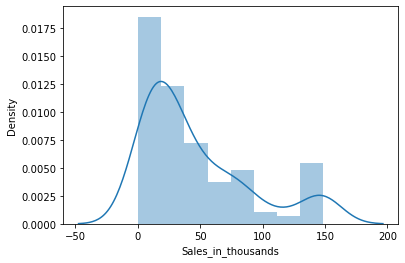

In [63]:
sns.distplot(Y)

<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

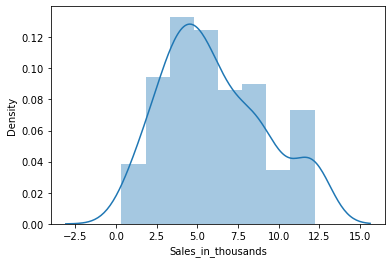

In [64]:
sns.distplot(np.sqrt(Y))

In [65]:
Y

0      16.919
1      39.384
2      14.114
3       8.588
4      20.397
        ...  
152     3.545
153    15.245
154    17.531
155     3.493
156    18.969
Name: Sales_in_thousands, Length: 157, dtype: float64

In [66]:
Y_final=np.sqrt(Y)

In [67]:
X_final=X_new[[
#     'four_year_resale_value',
         'Price_in_thousands',
        'Engine_size',
#          'Horsepower',
         'Wheelbase',
#          'Width',
#          'Length',
#        'Curb_weight',
#          'Fuel_capacity',
#          'Fuel_efficiency',
#          'Power_perf_factor',
       'Manufacturer_Ford',
#          'Manufacturer_Dodge',
         'Manufacturer_Toyota',
#        'Manufacturer_Chevrolet',
#          'Manufacturer_Mercedes-B',
#        'Manufacturer_Chrysler',
#          'Manufacturer_Mitsubishi',
#        'Manufacturer_Nissan',
#          'Manufacturer_Mercury',
#        'Manufacturer_Volkswagen',
#            'Vehicle_type_Car',
#          'Vehicle_type_Passenger'
        ]]

In [68]:
formula='Sales_in_thousands ~ ' + '+'.join(X_final.columns)

In [69]:
data=pd.concat([X_final,Y_final],axis=1)

In [70]:
model=smf.ols(formula=formula,data=data)

In [71]:
model=model.fit()

In [72]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Sales_in_thousands   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     29.78
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           5.72e-21
Time:                        13:47:08   Log-Likelihood:                -347.67
No. Observations:                 157   AIC:                             707.3
Df Residuals:                     151   BIC:                             725.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.2007    

In [73]:
predicted = model.predict(X_final)

In [74]:
from sklearn.metrics import mean_absolute_error

In [75]:
mean_absolute_error(Y,np.square(predicted))

22.62046946998508

<AxesSubplot:xlabel='Sales_in_thousands'>

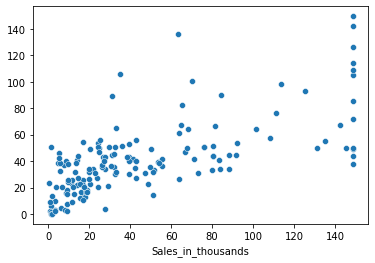

In [76]:
sns.scatterplot(x=Y,y=np.square(predicted))

<AxesSubplot:xlabel='Sales_in_thousands'>

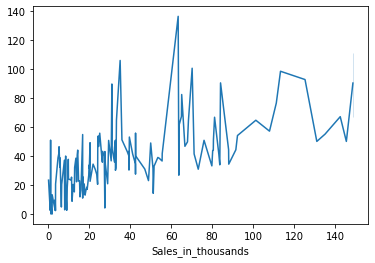

In [77]:
sns.lineplot(x=Y,y=np.square(predicted))

## Grid Search and Cross Validation

In [78]:
params={'n_estimators':[50,100,150],'max_depth':[4,5,6,7],'max_features':[4,6,8,10]}

In [79]:
grid=GridSearchCV(RandomForestRegressor(),param_grid=params,cv=2,verbose=True)

In [80]:
grid=grid.fit(X,Y)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


In [81]:
grid.best_params_

{'max_depth': 4, 'max_features': 10, 'n_estimators': 100}

## Random Forest Regressor

In [82]:
rf=RandomForestRegressor()

In [83]:
rf=rf.fit(X,Y)

In [84]:
rf.predict(X)

array([ 22.6107 ,  35.40215,  25.31895,  12.82613,  22.11121,  22.00121,
         3.25132,  24.56093,  12.15563,  17.19541,  79.39287,  45.04038,
        26.60363,  66.41205,  48.05825,  14.92645,  12.32991,  15.86771,
        21.5282 , 119.93042, 105.93171,  40.81776,  58.36268,  30.43095,
        13.96843,  45.01286,  42.94656,  89.01016,  22.80081,  29.76737,
        49.63427,  35.82775,  23.12609,  50.34837,  29.28462,  66.14914,
        21.28662,  66.15692,  69.84164,   3.72697, 122.79528,  42.84349,
        62.93362, 101.23349,  92.90454, 112.91001,  79.84598, 109.16983,
        74.22709, 125.0258 , 113.45487,  87.83915, 126.18448, 135.1764 ,
       113.94931, 128.78903, 133.93584, 113.69124, 119.7511 ,  56.54392,
        25.15116,  62.66995,  48.78277,  61.99365,  49.88059,  28.55815,
        14.18185,  58.43946,  76.78707, 105.64394,  22.74044,  13.64466,
         6.75519,   6.30874,   9.49082,  39.70357,  19.47555,  44.38841,
        29.26806,  35.35519,  41.39105,  51.05251, 

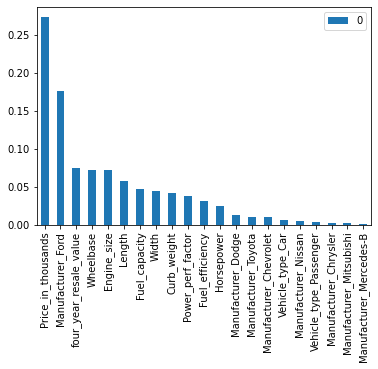

In [85]:
pd.DataFrame(rf.feature_importances_,index=X.columns).sort_values(0,ascending=False).plot(kind='bar')
plt.show()

In [86]:
print('Model Accuracy : ',metrics.r2_score(Y,rf.predict(X)))

Model Accuracy :  0.8955161720751031


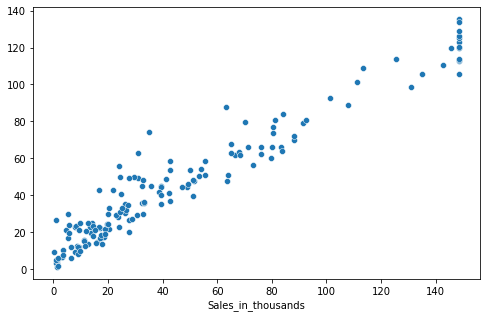

In [87]:
plt.figure(figsize=(8,5))
sns.scatterplot(Y,rf.predict(X))
plt.show()

## ============Happy Learning============